# Рандомизация сети
  ![](switch.jpg)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline
import networkx as nx
import random

In [26]:
G=nx.read_edgelist('bio-diseasome.txt') # сеть для проверки алгоритмов (можно использовать любую)
list(nx.selfloop_edges(G))

[]

### Алгоритм рандомизации и проверка алгоритма (5 балла)
* напишите функцию, проверяющую, совпадают ли два вектора степеней для заданных графов $G_1$ и $G_2$;

In [ ]:
def check_degrees(G1, G2):
    degs1 = [k for _, k in sorted(G1.degree(), key=lambda x: int(x[0]))]
    degs2 = [k for _, k in sorted(G2.degree(), key=lambda x: int(x[0]))]

    return degs1 == degs2

* напишите функцию рандомизации сети: 
  * (А) случайным образом выберите пару ребер, которые можно переключить между собой (новые ребра не должны быть петлями и мультиребрами!!!) и выполните переключение;
  * (B) повторите шаг (A) $N_{steps}$ раз. 
  
* проверьте, что ваша рандомизация действительно сохраняет степени вершин;

In [ ]:
def random_rewiring(G, N_steps):
    G_rand = G.copy() 
       
    for n in range(N_steps):
        edges = list(G_rand.edges())
        
        switched = False

        while not switched:
            e1 = random.choice(edges)
            e2 = random.choice(edges)

            if (e1[0] == e2[1] or e1[1] == e2[0] or G_rand.has_edge(e1[0], e2[1]) 
              or G_rand.has_edge(e2[0], e1[1])):
                continue
            
            switched = True

            G_rand.add_edge(e1[0], e2[1])
            G_rand.add_edge(e2[0], e1[1])
            G_rand.remove_edge(*e1)
            G_rand.remove_edge(*e2)
            
    return G_rand

check_degrees(G, random_rewiring(G, 10))

True

* напишите функцию, вычисляющую долю связей, оставшихся на месте после рандомизации сети $G$;

* постройте зависимость доли ребер, остающихся на месте от числа переключений. Число переключений выразите через число ребер в сети, т.е. $N_{steps}=\left[0.1E,~0.2E,~\dots~5E\right]$, $E$- число ребер.

In [ ]:
def remained_edges(G, Grand):
    intersection = nx.intersection(G, Grand)
    return len(intersection.edges()) / len(G.edges())

Text(0, 0.5, 'N of remained edges')

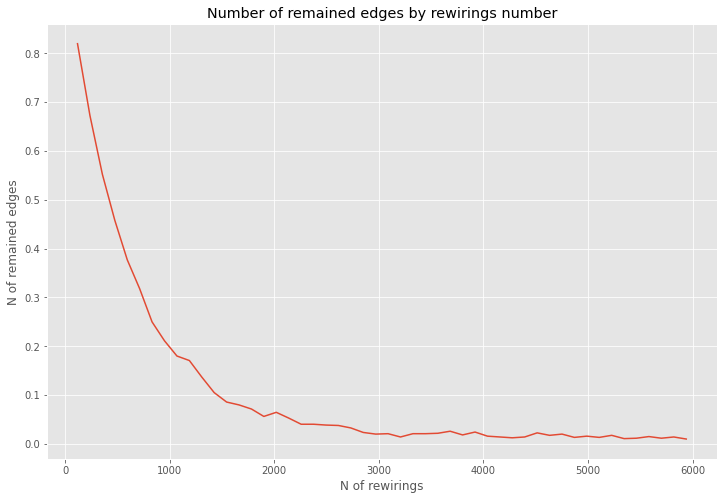

In [ ]:
E = len(G.edges())
Ns = (np.arange(0.1, 5.01, 0.1) * E).astype(int)

props = list(map(lambda N: remained_edges(G, random_rewiring(G, N)), Ns))

plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
plt.plot(Ns, props)
plt.title("Number of remained edges by rewirings number")
plt.xlabel("N of rewirings")
plt.ylabel("N of remained edges")

* вычислите различные структурные характеристики заданой сети (коэффициенты кластеризации, средний кратчайший путь, диаметр) и рандомизированной. Как изменились свойства? Почему? 

In [30]:
connected = False

while not connected:
    G_rand = random_rewiring(G, 1000)
    connected = nx.is_connected(G_rand)

In [31]:
import pandas as pd

df = pd.DataFrame(columns=['G', 'G randomized'], 
                  index=['Clustering coef.', 'Average shortest path', 'Diameter'])

for i, f in enumerate((nx.average_clustering, nx.average_shortest_path_length, 
                       nx.diameter)):
  for j, g in enumerate((G, G_rand)):
    df.iloc[i, j] = f(g)

df

,G,G randomized
Clustering coef.,0.63583,0.0185911
Average shortest path,6.50899,3.8891
Diameter,15,8


Все характеристики уменьшились: они приближаются к значениям рандомизированной сети (при числе переключений около 3000 доля оставшихся ребер на месте становится почти равной 0). Модель при этом по сути есть модель Эрдоша-Реньи $ G(n, M) $ с заданным распределением степеней: $ G(n, M, \vec{k}) $.